In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
from netCDF4 import date2num,num2date
#from scipy.ndimage import gaussian_filter

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:

ds_26 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_085_*_3z.nc', combine = 'by_coords', concat_dim = 'time')
ds_26.to_netcdf('test_26.nc')
ds26 = xr.open_dataset('test_26.nc')


C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
#test domain
#latbounds = [26.5, 27]
#lonbounds = [-91, -90.5]

#real domain 
latbounds = [24.5, 29]
lonbounds = [-93, -87.5]

lats = ds26.Latitude.values[:]
lons = ds26.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

u_subset_26=ds26.variables['u'][:,0,latli:latui, lonli:lonui]

lat_array=ds26.Latitude.values[latli:latui]
lon_array=ds26.Longitude.values[lonli:lonui]

meanU_26 = u_subset_26.mean('MT')


In [4]:
#March 26 Dopplerscat
#ds26_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0001-0110_line01.L2.nc')
ds26_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0118-0170_line02.L2.nc')
ds26_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0180-0227_line03.L2.nc')
ds26_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0238-0296_line04.L2.nc')
ds26_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0306-0348_line05.L2.nc')
ds26_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0360-0375_line06.L2.nc')
ds26_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0377-0419_line07.L2.nc')
ds26_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0429-0470_line08.L2.nc')
ds26_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0485-0533_line09.L2.nc')
ds26_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0543-0581_line10.L2.nc')
#ds26_11=xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0588-0682_line11.L2.nc')


In [5]:
print(ds26_1.variables)
print('\n', ds26_1.keys)

Frozen({'x': <xarray.IndexVariable 'x' (x: 279)>
array([-10049008.934062, -10048708.619645, -10048408.305228, ...,
        -9966122.154884,  -9965821.840467,  -9965521.526049])
Attributes:
    long_name:              Web Mercator easting
    units:                  m
    valid_min:              -1000000.0
    valid_max:              1000000.0
    coverage_content_type:  coordinate, 'y': <xarray.IndexVariable 'y' (y: 1259)>
array([3080652.007077, 3080952.013573, 3081252.02007 , ..., 3457460.166536,
       3457760.173032, 3458060.179529])
Attributes:
    long_name:              Web Mercator northing
    units:                  m
    valid_min:              -1000000.0
    valid_max:              1000000.0
    coverage_content_type:  coordinate, 'latitude': <xarray.Variable (y: 1259)>
array([26.656748, 26.659156, 26.661565, ..., 29.640793, 29.643135, 29.645477])
Attributes:
    standard_name:          latitude
    long_name:              Measurement center latitude
    units:              

In [6]:

#lat26_1=ds26_1.latitude.values
#lon26_1=ds26_1.longitude.values
#flag26_1=ds26_1.flag.values
#u_cur26_1=ds26_1.u_current.values

lat26_2=ds26_2.latitude.values
lon26_2=ds26_2.longitude.values
flag26_2=ds26_2.flag.values
u_cur26_2=ds26_2.u_current.values

lat26_3=ds26_3.latitude.values
lon26_3=ds26_3.longitude.values
flag26_3=ds26_3.flag.values
u_cur26_3=ds26_3.u_current.values

lat26_4=ds26_4.latitude.values
lon26_4=ds26_4.longitude.values
flag26_4=ds26_4.flag.values
u_cur26_4=ds26_4.u_current.values

lat26_5=ds26_5.latitude.values
lon26_5=ds26_5.longitude.values
flag26_5=ds26_5.flag.values
u_cur26_5=ds26_5.u_current.values

lat26_6=ds26_6.latitude.values
lon26_6=ds26_6.longitude.values
flag26_6=ds26_6.flag.values
u_cur26_6=ds26_6.u_current.values

lat26_7=ds26_7.latitude.values
lon26_7=ds26_7.longitude.values
flag26_7=ds26_7.flag.values
u_cur26_7=ds26_7.u_current.values

lat26_8=ds26_8.latitude.values
lon26_8=ds26_8.longitude.values
flag26_8=ds26_8.flag.values
u_cur26_8=ds26_8.u_current.values

lat26_9=ds26_9.latitude.values
lon26_9=ds26_9.longitude.values
flag26_9=ds26_9.flag.values
u_cur26_9=ds26_9.u_current.values

lat26_10=ds26_10.latitude.values
lon26_10=ds26_10.longitude.values
flag26_10=ds26_10.flag.values
u_cur26_10=ds26_10.u_current.values

#lat26_11=ds26_11.latitude.values
#lon26_11=ds26_11.longitude.values
#flag26_11=ds26_11.flag.values
#u_cur26_11=ds26_11.u_current.values


In [7]:
#Apply Error Flag 
#0 is good, 2 is bad
#set flag to only accept 0

#lonlen26_1=len(lon26_1) #236
#latlen26_1=len(lat26_1) #954
#goodUarr26_1=np.zeros((latlen26_1,lonlen26_1))
#goodUarr26_1[:]=np.nan
#for x in range (len(lon26_1)):
#    for y in range (len(lat26_1)):
#        if flag26_1[y,x] == 0:
#            goodUarr26_1[y,x] = u_cur26_1[y,x] 
           
lonlen26_2=len(lon26_2)
latlen26_2=len(lat26_2)
goodUarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodUarr26_2[:]=np.nan
for x in range (len(lon26_2)):
    for y in range (len(lat26_2)):
        if flag26_2[y,x] == 0:
            goodUarr26_2[y,x] = u_cur26_2[y,x] 

lonlen26_3=len(lon26_3)
latlen26_3=len(lat26_3)
goodUarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodUarr26_3[:]=np.nan
for x in range (len(lon26_3)):
    for y in range (len(lat26_3)):
        if flag26_3[y,x] == 0:
            goodUarr26_3[y,x] = u_cur26_3[y,x] 

lonlen26_4=len(lon26_4)
latlen26_4=len(lat26_4)
goodUarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodUarr26_4[:]=np.nan
for x in range (len(lon26_4)):
    for y in range (len(lat26_4)):
        if flag26_4[y,x] == 0:
            goodUarr26_4[y,x] = u_cur26_4[y,x] 
            
lonlen26_5=len(lon26_5)
latlen26_5=len(lat26_5)
goodUarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodUarr26_5[:]=np.nan
for x in range (len(lon26_5)):
    for y in range (len(lat26_5)):
        if flag26_5[y,x] == 0:
            goodUarr26_5[y,x] = u_cur26_5[y,x] 

lonlen26_6=len(lon26_6)
latlen26_6=len(lat26_6)
goodUarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodUarr26_6[:]=np.nan
for x in range (len(lon26_6)):
    for y in range (len(lat26_6)):
        if flag26_6[y,x] == 0:
            goodUarr26_6[y,x] = u_cur26_6[y,x] 
            
lonlen26_7=len(lon26_7)
latlen26_7=len(lat26_7)
goodUarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodUarr26_7[:]=np.nan
for x in range (len(lon26_7)):
    for y in range (len(lat26_7)):
        if flag26_7[y,x] == 0:
            goodUarr26_7[y,x] = u_cur26_7[y,x] 
            
lonlen26_8=len(lon26_8)
latlen26_8=len(lat26_8)
goodUarr26_8=np.zeros((latlen26_8, lonlen26_8))
goodUarr26_8[:]=np.nan
for x in range (len(lon26_8)):
    for y in range (len(lat26_8)):
        if flag26_8[y,x] == 0:
            goodUarr26_8[y,x] = u_cur26_8[y,x] 

lonlen26_9=len(lon26_9)
latlen26_9=len(lat26_9)
goodUarr26_9=np.zeros((latlen26_9, lonlen26_9))
goodUarr26_9[:]=np.nan
for x in range (len(lon26_9)):
    for y in range (len(lat26_9)):
        if flag26_9[y,x] == 0:
            goodUarr26_9[y,x] = u_cur26_9[y,x] 
            
lonlen26_10=len(lon26_10)
latlen26_10=len(lat26_10)
goodUarr26_10=np.zeros((latlen26_10, lonlen26_10))
goodUarr26_10[:]=np.nan
for x in range (len(lon26_10)):
    for y in range (len(lat26_10)):
        if flag26_10[y,x] == 0:
            goodUarr26_10[y,x] = u_cur26_10[y,x] 
            
#lonlen26_11=len(lon26_11)
#latlen26_11=len(lat26_11)
#goodUarr26_11=np.zeros((latlen26_11, lonlen26_11))
#goodUarr26_11[:]=np.nan
#for x in range (len(lon26_11)):
#    for y in range (len(lat26_11)):
#        if flag26_11[y,x] == 0:
#            goodUarr26_11[y,x] = u_cur26_11[y,x] 


In [8]:
#Gaussian Filter U26
#HYCOM: lat_array (Y), lon_array (X), meanU_25
#DS: goodUarr25_1-10, lat25_1, lon25_1s

HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######

#REAL CASE: 
#lat_0 =  24.5
#lon_0 = -93
#lat_max = 28.75
#lon_max = -87.5

#TEST CASE: DS Domain
lat_0 =  26.45
lon_0 = -90.9
lat_max = 27.15
lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90
#lat_max = 27
#lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
u26_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
u26_WRF[:] = -999
DS_weightedU26 = u26_WRF*0
HYCOM_weightedU26= u26_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 0.75 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg


for y in range (0, WRF_latLen):  
    for x in range (0, WRF_lonLen):
        sum_weight_HYCOM = 0
        sum_product_u26HYCOM = 0
        #sum_weight_DS26u1 = 0
        #sum_product_u26DS1 = 0
        sum_weight_DS26u2 = 0
        sum_product_u26DS2 = 0
        sum_weight_DS26u3 = 0
        sum_product_u26DS3 = 0
        sum_weight_DS26u4 = 0
        sum_product_u26DS4 = 0
        sum_weight_DS26u5 = 0
        sum_product_u26DS5 = 0
        sum_weight_DS26u6 = 0
        sum_product_u26DS6 = 0
        sum_weight_DS26u7 = 0
        sum_product_u26DS7 = 0
        sum_weight_DS26u8 = 0
        sum_product_u26DS8 = 0
        sum_weight_DS26u9 = 0
        sum_product_u26DS9 = 0
        sum_weight_DS26u10 = 0
        sum_product_u26DS10 = 0
        #sum_weight_DS26u11 = 0
        #sum_product_u26DS11 = 0
       
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])  

        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison
        #DS26u1_test1_In = np.where(lon26_1 >= min_lon)
        #DS26u1_test2_In = np.where(lon26_1 <= max_lon)
        #DS26u1_inter_like_lon = np.intersect1d(DS26u1_test1_In, DS26u1_test2_In)
        #DS26u1_test1_In = np.where(lat26_1 >= min_lat)
        #DS26u1_test2_In = np.where(lat26_1 <= max_lat)
        #DS26u1_inter_like_lat = np.intersect1d(DS26u1_test1_In, DS26u1_test2_In)         
        
        DS26u2_test1_In = np.where(lon26_2 >= min_lon)
        DS26u2_test2_In = np.where(lon26_2 <= max_lon)
        DS26u2_inter_like_lon = np.intersect1d(DS26u2_test1_In, DS26u2_test2_In)
        DS26u2_test1_In = np.where(lat26_2 >= min_lat)
        DS26u2_test2_In = np.where(lat26_2 <= max_lat)
        DS26u2_inter_like_lat = np.intersect1d(DS26u2_test1_In, DS26u2_test2_In) 
        
        DS26u3_test1_In = np.where(lon26_3 >= min_lon)
        DS26u3_test2_In = np.where(lon26_3 <= max_lon)
        DS26u3_inter_like_lon = np.intersect1d(DS26u3_test1_In, DS26u3_test2_In)
        DS26u3_test1_In = np.where(lat26_3 >= min_lat)
        DS26u3_test2_In = np.where(lat26_3 <= max_lat)
        DS26u3_inter_like_lat = np.intersect1d(DS26u3_test1_In, DS26u3_test2_In) 
        
        DS26u4_test1_In = np.where(lon26_4 >= min_lon)
        DS26u4_test2_In = np.where(lon26_4 <= max_lon)
        DS26u4_inter_like_lon = np.intersect1d(DS26u4_test1_In, DS26u4_test2_In)
        DS26u4_test1_In = np.where(lat26_4 >= min_lat)
        DS26u4_test2_In = np.where(lat26_4 <= max_lat)
        DS26u4_inter_like_lat = np.intersect1d(DS26u4_test1_In, DS26u4_test2_In)         
        
        DS26u5_test1_In = np.where(lon26_5 >= min_lon)
        DS26u5_test2_In = np.where(lon26_5 <= max_lon)
        DS26u5_inter_like_lon = np.intersect1d(DS26u5_test1_In, DS26u5_test2_In)
        DS26u5_test1_In = np.where(lat26_5 >= min_lat)
        DS26u5_test2_In = np.where(lat26_5 <= max_lat)
        DS26u5_inter_like_lat = np.intersect1d(DS26u5_test1_In, DS26u5_test2_In) 
        
        DS26u6_test1_In = np.where(lon26_6 >= min_lon)
        DS26u6_test2_In = np.where(lon26_6 <= max_lon)
        DS26u6_inter_like_lon = np.intersect1d(DS26u6_test1_In, DS26u6_test2_In)
        DS26u6_test1_In = np.where(lat26_6 >= min_lat)
        DS26u6_test2_In = np.where(lat26_6 <= max_lat)
        DS26u6_inter_like_lat = np.intersect1d(DS26u6_test1_In, DS26u6_test2_In) 

        DS26u7_test1_In = np.where(lon26_7 >= min_lon)
        DS26u7_test2_In = np.where(lon26_7 <= max_lon)
        DS26u7_inter_like_lon = np.intersect1d(DS26u7_test1_In, DS26u7_test2_In)
        DS26u7_test1_In = np.where(lat26_7 >= min_lat)
        DS26u7_test2_In = np.where(lat26_7 <= max_lat)
        DS26u7_inter_like_lat = np.intersect1d(DS26u7_test1_In, DS26u7_test2_In)
    
        DS26u8_test1_In = np.where(lon26_8 >= min_lon)
        DS26u8_test2_In = np.where(lon26_8 <= max_lon)
        DS26u8_inter_like_lon = np.intersect1d(DS26u8_test1_In, DS26u8_test2_In)
        DS26u8_test1_In = np.where(lat26_8 >= min_lat)
        DS26u8_test2_In = np.where(lat26_8 <= max_lat)
        DS26u8_inter_like_lat = np.intersect1d(DS26u8_test1_In, DS26u8_test2_In) 
        
        DS26u9_test1_In = np.where(lon26_9 >= min_lon)
        DS26u9_test2_In = np.where(lon26_9 <= max_lon)
        DS26u9_inter_like_lon = np.intersect1d(DS26u9_test1_In, DS26u9_test2_In)
        DS26u9_test1_In = np.where(lat26_9 >= min_lat)
        DS26u9_test2_In = np.where(lat26_9 <= max_lat)
        DS26u9_inter_like_lat = np.intersect1d(DS26u9_test1_In, DS26u9_test2_In) 
        
        DS26u10_test1_In = np.where(lon26_10 >= min_lon)
        DS26u10_test2_In = np.where(lon26_10 <= max_lon)
        DS26u10_inter_like_lon = np.intersect1d(DS26u10_test1_In, DS26u10_test2_In)
        DS26u10_test1_In = np.where(lat26_10 >= min_lat)
        DS26u10_test2_In = np.where(lat26_10 <= max_lat)
        DS26u10_inter_like_lat = np.intersect1d(DS26u10_test1_In, DS26u10_test2_In) 
        
        #DS26u11_test1_In = np.where(lon26_11 >= min_lon)
        #DS26u11_test2_In = np.where(lon26_11 <= max_lon)
        #DS26u11_inter_like_lon = np.intersect1d(DS26u11_test1_In, DS26u11_test2_In)
        #DS26u11_test1_In = np.where(lat26_11 >= min_lat)
        #DS26u11_test2_In = np.where(lat26_11 <= max_lat)
        #DS26u11_inter_like_lat = np.intersect1d(DS26u11_test1_In, DS26u11_test2_In) 
        #np.where((HYCOM_lon >= min_lon) and (HYCOM_lon <= max_lon), HYCOM_lon)
        #np.where((HYCOM_lat >= min_lat) and (HYCOM_lat <= max_lat))
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index
        #DS26u1_lon_indices =  DS26u1_inter_like_lon
        #DS26u1_lat_indices =  DS26u1_inter_like_lat
        DS26u2_lon_indices =  DS26u2_inter_like_lon
        DS26u2_lat_indices =  DS26u2_inter_like_lat
        DS26u3_lon_indices =  DS26u3_inter_like_lon
        DS26u3_lat_indices =  DS26u3_inter_like_lat
        DS26u4_lon_indices =  DS26u4_inter_like_lon
        DS26u4_lat_indices =  DS26u4_inter_like_lat        
        DS26u5_lon_indices =  DS26u5_inter_like_lon
        DS26u5_lat_indices =  DS26u5_inter_like_lat
        DS26u6_lon_indices =  DS26u6_inter_like_lon
        DS26u6_lat_indices =  DS26u6_inter_like_lat
        DS26u7_lon_indices =  DS26u7_inter_like_lon
        DS26u7_lat_indices =  DS26u7_inter_like_lat
        DS26u8_lon_indices =  DS26u8_inter_like_lon
        DS26u8_lat_indices =  DS26u8_inter_like_lat
        DS26u9_lon_indices =  DS26u9_inter_like_lon
        DS26u9_lat_indices =  DS26u9_inter_like_lat 
        DS26u10_lon_indices =  DS26u10_inter_like_lon
        DS26u10_lat_indices =  DS26u10_inter_like_lat  
        #DS26u11_lon_indices =  DS26u11_inter_like_lon
        #DS26u11_lat_indices =  DS26u11_inter_like_lat  
        #lon_indices = np.logical_and(HYCOM_lon >= min_lon, HYCOM_lon <= max_lon)  
        #lat_indices = np.logical_and(HYCOM_lat >= min_lat, HYCOM_lat <= max_lat)
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        #DS26u1_good_lon = lon26_1[DS26u1_lon_indices]
        #DS26u1_good_lat = lat26_1[DS26u1_lat_indices] 
        DS26u2_good_lon = lon26_2[DS26u2_lon_indices]
        DS26u2_good_lat = lat26_2[DS26u2_lat_indices] 
        DS26u3_good_lon = lon26_3[DS26u3_lon_indices]
        DS26u3_good_lat = lat26_3[DS26u3_lat_indices] 
        DS26u4_good_lon = lon26_4[DS26u4_lon_indices]
        DS26u4_good_lat = lat26_4[DS26u4_lat_indices] 
        DS26u5_good_lon = lon26_5[DS26u5_lon_indices]
        DS26u5_good_lat = lat26_5[DS26u5_lat_indices] 
        DS26u6_good_lon = lon26_6[DS26u6_lon_indices]
        DS26u6_good_lat = lat26_6[DS26u6_lat_indices] 
        DS26u7_good_lon = lon26_7[DS26u7_lon_indices]
        DS26u7_good_lat = lat26_7[DS26u7_lat_indices] 
        DS26u8_good_lon = lon26_8[DS26u8_lon_indices]
        DS26u8_good_lat = lat26_8[DS26u8_lat_indices]
        DS26u9_good_lon = lon26_9[DS26u9_lon_indices]
        DS26u9_good_lat = lat26_9[DS26u9_lat_indices] 
        DS26u10_good_lon = lon26_10[DS26u10_lon_indices]
        DS26u10_good_lat = lat26_10[DS26u10_lat_indices]
        #DS26u11_good_lon = lon26_11[DS26u11_lon_indices]
        #DS26u11_good_lat = lat26_11[DS26u11_lat_indices]    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        #DS26u1_good_lon_len = len(DS26u1_good_lon)
        #DS26u1_good_lat_len = len(DS26u1_good_lat) 
        DS26u2_good_lon_len = len(DS26u2_good_lon)
        DS26u2_good_lat_len = len(DS26u2_good_lat) 
        DS26u3_good_lon_len = len(DS26u3_good_lon)
        DS26u3_good_lat_len = len(DS26u3_good_lat) 
        DS26u4_good_lon_len = len(DS26u4_good_lon)
        DS26u4_good_lat_len = len(DS26u4_good_lat) 
        DS26u5_good_lon_len = len(DS26u5_good_lon)
        DS26u5_good_lat_len = len(DS26u5_good_lat) 
        DS26u6_good_lon_len = len(DS26u6_good_lon)
        DS26u6_good_lat_len = len(DS26u6_good_lat)  
        DS26u7_good_lon_len = len(DS26u7_good_lon)
        DS26u7_good_lat_len = len(DS26u7_good_lat) 
        DS26u8_good_lon_len = len(DS26u8_good_lon)
        DS26u8_good_lat_len = len(DS26u8_good_lat) 
        DS26u9_good_lon_len = len(DS26u9_good_lon)
        DS26u9_good_lat_len = len(DS26u9_good_lat) 
        DS26u10_good_lon_len = len(DS26u10_good_lon)
        DS26u10_good_lat_len = len(DS26u10_good_lat)      
        #DS26u11_good_lon_len = len(DS26u11_good_lon)
        #DS26u11_good_lat_len = len(DS26u11_good_lat)  
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #print('distance: ', distance)
                #print('3sigma', 3*sigma_HYCOM)
                #print(y, x, y_small, x_small, distance, good_lat[y_small], WRF_lat[y], good_lon[x_small], WRF_lon[x])
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                #print('sum_weight_HYCOM: ', sum_weight_HYCOM)

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_u26HYCOM = sum_product_u26HYCOM + weight_HYCOM * meanU_26[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_v25HYCOM = sum_product_v25HYCOM + weight_HYCOM * meanV_25[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_u26HYCOM = sum_product_u26HYCOM + weight_HYCOM * meanU_26[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_v26HYCOM = sum_product_v26HYCOM + weight_HYCOM * meanV_26[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_sst25HYCOM = sum_product_sst25HYCOM + weight_HYCOM * meanSST_25[lat_indices[y_small], lon_indices[x_small]]
                #sum_product_sst26HYCOM = sum_product_sst26HYCOM + weight_HYCOM * meanSST_26[lat_indices[y_small], lon_indices[x_small]]
                HYCOM_weightedU26[y,x] =  sum_product_u26HYCOM/sum_weight_HYCOM
                
        #loop through values of good DS arrays 
        #for y_small_DS26u1 in range(0, DS26u1_good_lat_len):
        #    for x_small_DS26u1 in range(0, DS26u1_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS26u1_good_lat[y_small_DS26u1]-WRF_lat[y])**2+((DS26u1_good_lon[x_small_DS26u1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_1[DS26u1_lat_indices[y_small_DS26u1], DS26u1_lon_indices[x_small_DS26u1]]): 
        #            weight_DS26u1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS26u1 = sum_weight_DS26u1 + weight_DS26u1
        #            sum_product_u26DS1 = sum_product_u26DS1 + weight_DS26u1 * goodUarr26_1[DS26u1_lat_indices[y_small_DS26u1], DS26u1_lon_indices[x_small_DS26u1]]
        #        else: 
        #            weight_DS26u1 = 0
        
        
        for y_small_DS26u2 in range(0, DS26u2_good_lat_len):
            for x_small_DS26u2 in range(0, DS26u2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u2_good_lat[y_small_DS26u2]-WRF_lat[y])**2+((DS26u2_good_lon[x_small_DS26u2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_2[DS26u2_lat_indices[y_small_DS26u2], DS26u2_lon_indices[x_small_DS26u2]]): 
                    weight_DS26u2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u2 = sum_weight_DS26u2 + weight_DS26u2
                    sum_product_u26DS2 = sum_product_u26DS2 + weight_DS26u2 * goodUarr26_2[DS26u2_lat_indices[y_small_DS26u2], DS26u2_lon_indices[x_small_DS26u2]]
                else: 
                    weight_DS26u2 = 0
        
        
        for y_small_DS26u3 in range(0, DS26u3_good_lat_len):
            for x_small_DS26u3 in range(0, DS26u3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u3_good_lat[y_small_DS26u3]-WRF_lat[y])**2+((DS26u3_good_lon[x_small_DS26u3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_3[DS26u3_lat_indices[y_small_DS26u3], DS26u3_lon_indices[x_small_DS26u3]]): 
                    weight_DS26u3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u3 = sum_weight_DS26u3 + weight_DS26u3
                    sum_product_u26DS3 = sum_product_u26DS3 + weight_DS26u3 * goodUarr26_3[DS26u3_lat_indices[y_small_DS26u3], DS26u3_lon_indices[x_small_DS26u3]]
                else: 
                    weight_DS26u3 = 0 
                    
        for y_small_DS26u4 in range(0, DS26u4_good_lat_len):
            for x_small_DS26u4 in range(0, DS26u4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u4_good_lat[y_small_DS26u4]-WRF_lat[y])**2+((DS26u4_good_lon[x_small_DS26u4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_4[DS26u4_lat_indices[y_small_DS26u4], DS26u4_lon_indices[x_small_DS26u4]]): 
                    weight_DS26u4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u4 = sum_weight_DS26u4 + weight_DS26u4
                    sum_product_u26DS4 = sum_product_u26DS4 + weight_DS26u4 * goodUarr26_4[DS26u4_lat_indices[y_small_DS26u4], DS26u4_lon_indices[x_small_DS26u4]]
                else: 
                    weight_DS26u4 = 0 
                    
        for y_small_DS26u5 in range(0, DS26u5_good_lat_len):
            for x_small_DS26u5 in range(0, DS26u5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u5_good_lat[y_small_DS26u5]-WRF_lat[y])**2+((DS26u5_good_lon[x_small_DS26u5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_5[DS26u5_lat_indices[y_small_DS26u5], DS26u5_lon_indices[x_small_DS26u5]]): 
                    weight_DS26u5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u5 = sum_weight_DS26u5 + weight_DS26u5
                    sum_product_u26DS5 = sum_product_u26DS5 + weight_DS26u5 * goodUarr26_5[DS26u5_lat_indices[y_small_DS26u5], DS26u5_lon_indices[x_small_DS26u5]]
                else: 
                    weight_DS26u5 = 0 
                    
        for y_small_DS26u6 in range(0, DS26u6_good_lat_len):
            for x_small_DS26u6 in range(0, DS26u6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS26u6_good_lat[y_small_DS26u6]-WRF_lat[y])**2+((DS26u6_good_lon[x_small_DS26u6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_6[DS26u6_lat_indices[y_small_DS26u6], DS26u6_lon_indices[x_small_DS26u6]]): 
                    weight_DS26u6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u6 = sum_weight_DS26u6 + weight_DS26u6
                    sum_product_u26DS6 = sum_product_u26DS6 + weight_DS26u6 * goodUarr26_6[DS26u6_lat_indices[y_small_DS26u6], DS26u6_lon_indices[x_small_DS26u6]]
                else: 
                    weight_DS26u6 = 0 
                    
        for y_small_DS26u7 in range(0, DS26u7_good_lat_len):
            for x_small_DS26u7 in range(0, DS26u7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u7_good_lat[y_small_DS26u7]-WRF_lat[y])**2+((DS26u7_good_lon[x_small_DS26u7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_7[DS26u7_lat_indices[y_small_DS26u7], DS26u7_lon_indices[x_small_DS26u7]]): 
                    weight_DS26u7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u7 = sum_weight_DS26u7 + weight_DS26u7
                    sum_product_u26DS7 = sum_product_u26DS7 + weight_DS26u7 * goodUarr26_7[DS26u7_lat_indices[y_small_DS26u7], DS26u7_lon_indices[x_small_DS26u7]]
                else: 
                    weight_DS26u7 = 0 
                    
        for y_small_DS26u8 in range(0, DS26u8_good_lat_len):
            for x_small_DS26u8 in range(0, DS26u8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u8_good_lat[y_small_DS26u8]-WRF_lat[y])**2+((DS26u8_good_lon[x_small_DS26u8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_8[DS26u8_lat_indices[y_small_DS26u8], DS26u8_lon_indices[x_small_DS26u8]]): 
                    weight_DS26u8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u8 = sum_weight_DS26u8 + weight_DS26u8
                    sum_product_u26DS8 = sum_product_u26DS8 + weight_DS26u8 * goodUarr26_8[DS26u8_lat_indices[y_small_DS26u8], DS26u8_lon_indices[x_small_DS26u8]]
                else: 
                    weight_DS26u8 = 0 
                    
        for y_small_DS26u9 in range(0, DS26u9_good_lat_len):
            for x_small_DS26u9 in range(0, DS26u9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u9_good_lat[y_small_DS26u9]-WRF_lat[y])**2+((DS26u9_good_lon[x_small_DS26u9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_9[DS26u9_lat_indices[y_small_DS26u9], DS26u9_lon_indices[x_small_DS26u9]]): 
                    weight_DS26u9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u9 = sum_weight_DS26u9 + weight_DS26u9
                    sum_product_u26DS9 = sum_product_u26DS9 + weight_DS26u9 * goodUarr26_9[DS26u9_lat_indices[y_small_DS26u9], DS26u9_lon_indices[x_small_DS26u9]]
                else: 
                    weight_DS26u9 = 0 
                    
        for y_small_DS26u10 in range(0, DS26u10_good_lat_len):
            for x_small_DS26u10 in range(0, DS26u10_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26u10_good_lat[y_small_DS26u10]-WRF_lat[y])**2+((DS26u10_good_lon[x_small_DS26u10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_10[DS26u10_lat_indices[y_small_DS26u10], DS26u10_lon_indices[x_small_DS26u10]]): 
                    weight_DS26u10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26u10 = sum_weight_DS26u10 + weight_DS26u10
                    sum_product_u26DS10 = sum_product_u26DS10 + weight_DS26u10 * goodUarr26_10[DS26u10_lat_indices[y_small_DS26u10], DS26u10_lon_indices[x_small_DS26u10]]
                else: 
                    weight_DS26u10 = 0 
                    
        #for y_small_DS26u11 in range(0, DS26u11_good_lat_len):
        #    for x_small_DS26u11 in range(0, DS26u11_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS26u11_good_lat[y_small_DS26u11]-WRF_lat[y])**2+((DS26u11_good_lon[x_small_DS26u11]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodUarr26_11[DS26u11_lat_indices[y_small_DS26u11], DS26u11_lon_indices[x_small_DS26u11]]): 
        #            weight_DS26u11 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS26u11 = sum_weight_DS26u11 + weight_DS26u11
        #            sum_product_u26DS11 = sum_product_u26DS11 + weight_DS26u11 * goodUarr26_11[DS26u11_lat_indices[y_small_DS26u11], DS26u11_lon_indices[x_small_DS26u11]]
        #        else: 
        #            weight_DS26u11 = 0 
                    
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS26u2 + sum_weight_DS26u2 + sum_weight_DS26u3 + sum_weight_DS26u4 + sum_weight_DS26u5 + sum_weight_DS26u6 + sum_weight_DS26u7 + sum_weight_DS26u8 + sum_weight_DS26u9 + sum_weight_DS26u10) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedU26[y,x] =  (sum_product_u26DS2 + sum_product_u26DS3 + sum_product_u26DS4 + sum_product_u26DS5 + sum_product_u26DS6 + sum_product_u26DS7 + sum_product_u26DS8 + sum_product_u26DS9 + sum_product_u26DS10 )/(sum_weight_DS26u2 + sum_weight_DS26u2 + sum_weight_DS26u3 + sum_weight_DS26u4 + sum_weight_DS26u5 + sum_weight_DS26u6 + sum_weight_DS26u7 + sum_weight_DS26u8 + sum_weight_DS26u9 + sum_weight_DS26u10) #add each DS sum, add ech sum weigth 
        else: 
            DS_weightedU26[y,x] = -999
            
        u26_WRF[y,x] = (sum_product_u26HYCOM + sum_product_u26DS2 + sum_product_u26DS3 + sum_product_u26DS4 + sum_product_u26DS5 + sum_product_u26DS6 + sum_product_u26DS7 + sum_product_u26DS8 + sum_product_u26DS9 + sum_product_u26DS10)/(sum_weight_HYCOM  + sum_weight_DS26u2 + sum_weight_DS26u2 + sum_weight_DS26u3 + sum_weight_DS26u4 + sum_weight_DS26u5 + sum_weight_DS26u6 + sum_weight_DS26u7 + sum_weight_DS26u8 + sum_weight_DS26u9 + sum_weight_DS26u10 ) #add each DS sum, add ech sum weigth 


In [10]:
print(u26_WRF.shape)
print(u26_WRF)
print(DS_weightedU26.shape)
print(HYCOM_weightedU26.shape)
print(DS_weightedU26)
print(HYCOM_weightedU26)

for x in u26_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in u26_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')  

(73, 167)
[[-0.12662969 -0.13104164 -0.13693122 ... -1.08622729 -1.08620942
  -1.0861986 ]
 [-0.12749218 -0.13235497 -0.13826295 ... -1.08422796 -1.08391814
  -1.08373217]
 [-0.12938917 -0.13383119 -0.13975994 ... -1.08061062 -1.08057905
  -1.08094063]
 ...
 [-0.2299924  -0.22398781 -0.2160182  ... -0.59686554 -0.53790721
  -0.365387  ]
 [-0.22794463 -0.22184328 -0.21374591 ... -0.61406079 -0.59192293
  -0.35872367]
 [-0.22699919 -0.2206572  -0.21248973 ... -0.617055   -0.56439715
  -0.3554918 ]]
(73, 167)
(73, 167)
[[-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -9.99000000e+02
  -9.99000000e+02 -9.99000000e+02]
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -9.99000000e+02
  -9.99000000e+02 -9.99000000e+02]
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -9.99000000e+02
  -9.99000000e+02 -9.99000000e+02]
 ...
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -6.10495128e-01
  -5.98186546e-01 -9.99000000e+02]
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ...

C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


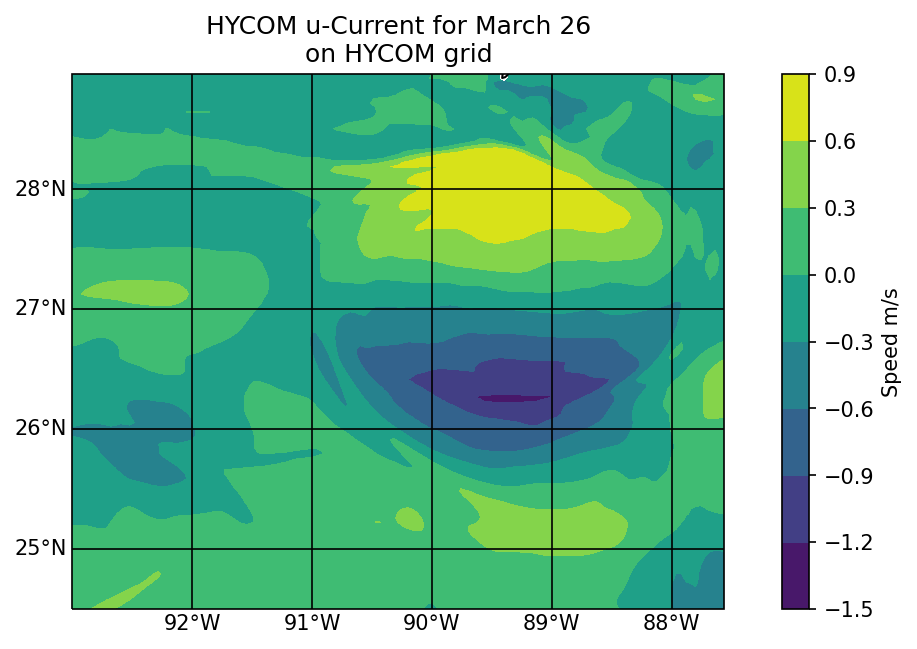

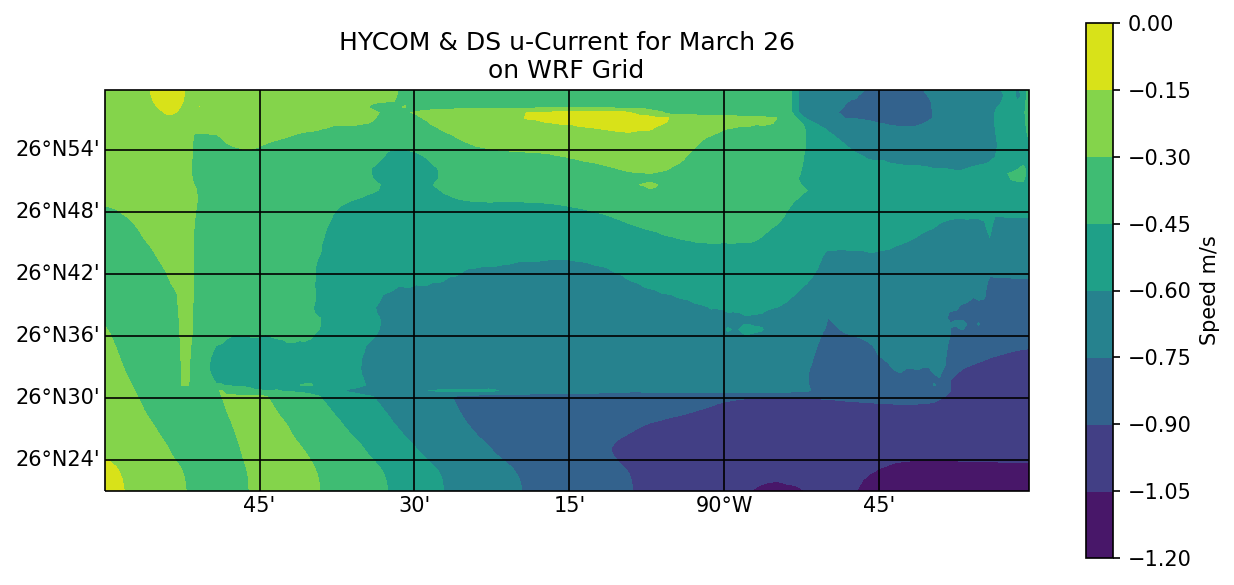

In [11]:
#U26
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanU_26)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM u-Current for March 26\non HYCOM grid')
plt.show()

#U26 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, u26_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM & DS u-Current for March 26\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '26U_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

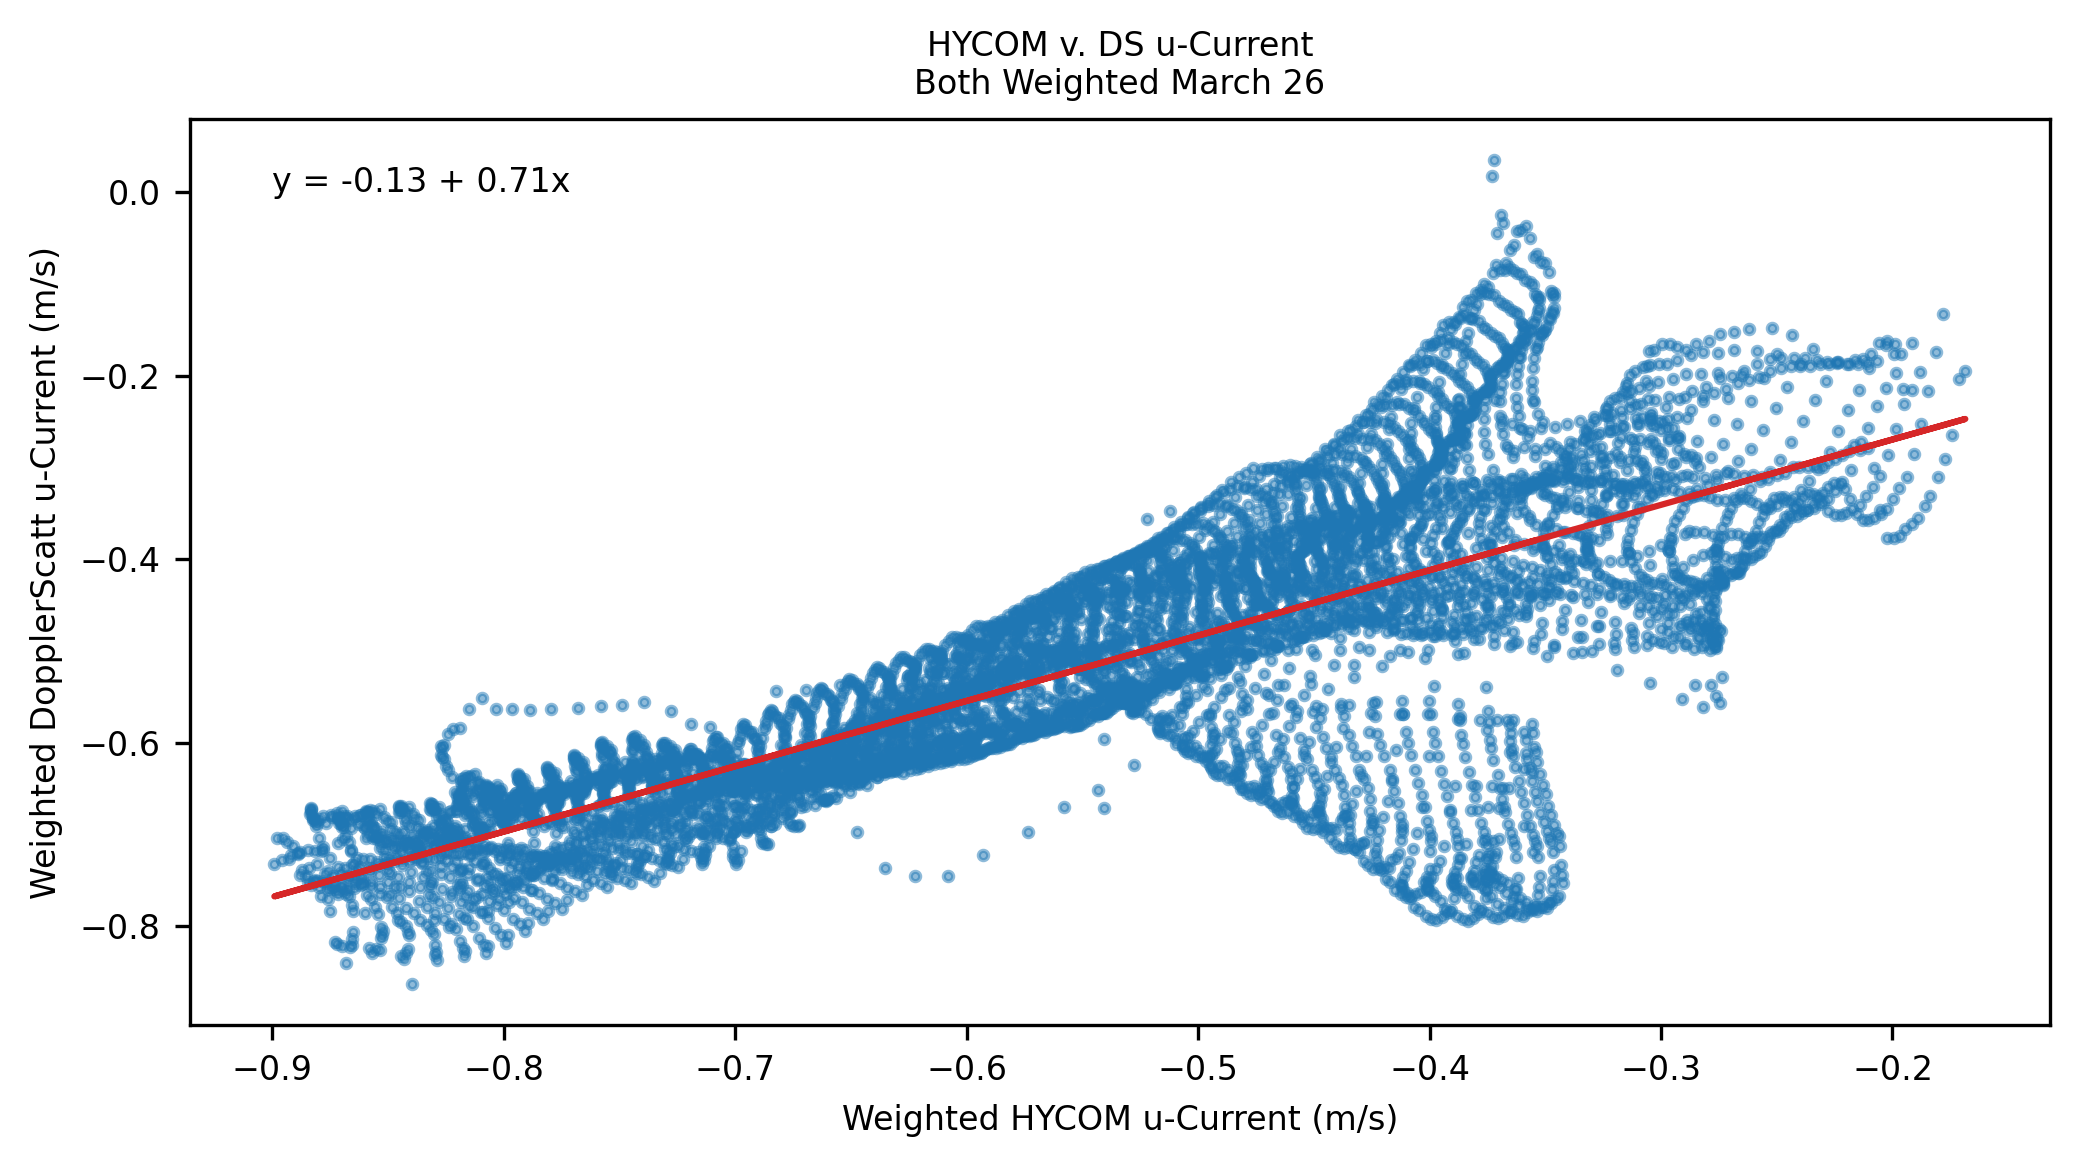

In [13]:
#Scatter for U HYCOM and U DS 

DS26U = DS_weightedU26.flatten() #y, noisier variable on y 
HYCOM26U = HYCOM_weightedU26.flatten() #x 

test_1 = np.where(DS26U!=-999)
test_2 = DS26U[test_1]
test_3 = HYCOM26U[test_1]

DS26U = test_2
HYCOM26U = test_3
a, b = np.polyfit(HYCOM26U, DS26U, 1)
#add line of best fit to plot
#plt.plot(x, a*x+b)
#add fitted regression equation to plot
#plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
figure(figsize=(8,4), dpi=300)
#alpha between 0 and 1, 0=transparent, 1=solid
plt.scatter(HYCOM26U, DS26U, color='tab:blue', alpha=0.50, s=5)
plt.plot(HYCOM26U, a*HYCOM26U+b, color = 'tab:red')
plt.text(-0.9, 0.0, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)
plt.title('HYCOM v. DS u-Current\nBoth Weighted March 26')
plt.ylabel('Weighted DopplerScatt u-Current (m/s)')
plt.xlabel('Weighted HYCOM u-Current (m/s)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '26U_Scatter.png', bbox_inches = 'tight',dpi = 150)
plt.show()


In [ ]:
#NETCDF TEST

#OPEN FILE, CREATE NEW DATASET
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass
ncfile = nc.Dataset('/Users/Anna/Desktop/MSMET/Thesis/new1.nc', mode='w',format='NETCDF4_CLASSIC') 
print(ncfile)

#CREATING DIMENSIONS
#lat_dim = ncfile.createDimension('lat', 73)     # latitude axis
#lon_dim = ncfile.createDimension('lon', 144)    # longitude axis
lat_dim = ncfile.createDimension('lat', 490)     # latitude axis
lon_dim = ncfile.createDimension('lon', 613)    # longitude axis
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
for dim in ncfile.dimensions.items():
    print(dim)

#CREATING ATTRIBUTES
#ncfile.title='My model data'
ncfile.title='WRF_out_test'
print(ncfile.title)

#ncfile.subtitle="My model data subtitle"
ncfile.subtitle="u26"
print(ncfile.subtitle)
print(ncfile)

#CREATING VARIABLES
# Define two variables with the same names as dimensions,
# a conventional way to define "coordinate variables".
lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'
time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'hours since 1800-01-01'
time.long_name = 'time'
# Define a 3D variable to hold the data
#temp = ncfile.createVariable('temp',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
#temp.units = 'K' # degrees Kelvin
#temp.standard_name = 'air_temperature' # this is a CF standard name
#print(temp)
u_current = ncfile.createVariable('u_current',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
u_current.units = 'm/s' # degrees Kelvin
u_current.standard_name = 'east-west current component' # this is a CF standard name
print(u_current)
u_current[:,:] =  u26_WRF
print('\nu_currents:', u26_WRF[:,:])
#PREDEFINED VARIABLES
#print("-- Some pre-defined attributes for variable temp:")
#print("temp.dimensions:", temp.dimensions)
#print("temp.shape:", temp.shape)
#print("temp.dtype:", temp.dtype)
#print("temp.ndim:", temp.ndim)
print("\n-- Some pre-defined attributes for variable u_current:")
print("u_current.dimensions:", u_current.dimensions)
print("u_current.shape:", u_current.shape)
print("u_current.dtype:", u_current.dtype)
print("u_current.ndim:", u_current.ndim)

#WRITING DATA
#nlats = len(lat_dim); nlons = len(lon_dim); ntimes = 3
# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
#lat[:] = -90. + (180./nlats)*np.arange(nlats) # south pole to north pole
#lon[:] = (180./nlats)*np.arange(nlons) # Greenwich meridian eastward
# create a 3D array of random numbers
#data_arr = np.random.uniform(low=280,high=330,size=(ntimes,nlats,nlons))
# Write the data.  This writes the whole 3D netCDF variable all at once.
#temp[:,:,:] = data_arr  # Appends data along unlimited dimension
#print("-- Wrote data, temp.shape is now ", temp.shape)
# read data back from variable (by slicing it), print min and max
#print("-- Min/Max values:", temp[:,:,:].min(), temp[:,:,:].max())

#nlats = len(lat_dim); nlons = len(lon_dim); ntimes = 3
# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
#lat[:] = -90. + (180./nlats)*np.arange(nlats) # south pole to north pole
#lon[:] = (180./nlats)*np.arange(nlons) # Greenwich meridian eastward
lat[:] = WRF_lat 
lon[:]= WRF_lon
print('\nlats:', lat[:])
print('lons;', lon[:])
# create a 3D array of random numbers
#data_arr = np.random.uniform(low=280,high=330,size=(ntimes,nlats,nlons))
# Write the data.  This writes the whole 3D netCDF variable all at once.
#u_current[:,:,:] = data_arr  # Appends data along unlimited dimension
#print("-- Wrote data, u_current.shape is now ", u_current.shape)
# read data back from variable (by slicing it), print min and max
#print("-- Min/Max values:", u_current[:,:,:].min(), u_current[:,:,:].max())
'''
# create a 2D array of random numbers
#data_slice = np.random.uniform(low=280,high=330,size=(nlats,nlons))
#temp[3,:,:] = data_slice   # Appends the 4th time slice
print("-- Wrote more data, u_current.shape is now ", u_current.shape)
# create a 2D array of random numbers
data_slice = np.random.uniform(low=280,high=330,size=(nlats,nlons))
u_current[3,:,:] = data_slice   # Appends the 4th time slice
print("-- Wrote more data, u_current.shape is now ", u_current.shape)
'''
print(time)
times_arr = time[:]
print(type(times_arr),times_arr)  # dashes indicate masked values (where data has not yet been written)

# 1st 4 days of October.
#dates = [dt.datetime(2014,10,1,0),dt.datetime(2014,10,2,0),dt.datetime(2014,10,3,0),dt.datetime(2014,10,4,0)]
#print(dates)
dates = [dt.datetime(2018,3,25,0)]
print(dates)
times = date2num(dates, time.units)
print(times, time.units) # numeric values
time[:] = times
# read time data back, convert to datetime instances, check values.
print(time[:])
print(time.units)
print(num2date(time[:],time.units))

#CLOSING NETCDF
# first print the Dataset object to see what we've got
print(ncfile)
# close the Dataset.
ncfile.close(); print('\nDataset is closed!')
